In [701]:
#import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import PolynomialFeatures, scale
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [702]:
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [703]:
housing.shape

(1460, 81)

## Data Cleaning and Understanding

In [704]:
null_cols = housing.columns[housing.isnull().sum()>0]
null_cols

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [705]:
housing[null_cols].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [706]:
#drop Alley, PoolQC, Fence, MiscFeature since most of then contains null values
housing.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)


In [707]:
null_cols = housing.columns[housing.isnull().sum()>0]
null_cols

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [708]:
housing[null_cols].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [709]:
#Fill missing values of LotFrontage and GarageYrBlt with mean
housing.GarageYrBlt.fillna(housing.GarageYrBlt.mean(), inplace=True)
housing.LotFrontage.fillna(housing.LotFrontage.mean(), inplace=True)

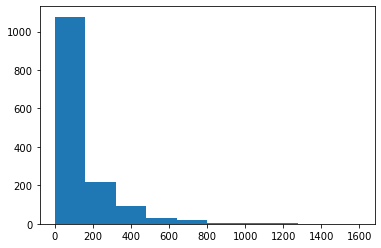

In [710]:
# view distribution of data in MasVnrArea 
plt.hist(housing.MasVnrArea)
plt.show()

In [711]:
housing.MasVnrArea.mode()

0    0.0
dtype: float64

In [712]:
#Fill missing values in MasVnrArea with the mode
housing.MasVnrArea.fillna(housing.MasVnrArea.mode()[0], inplace=True)

In [713]:
housing[null_cols]

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.000000,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.000000,RFn,TA,TA
1,80.000000,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.000000,RFn,TA,TA
2,68.000000,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.000000,RFn,TA,TA
3,60.000000,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.000000,Unf,TA,TA
4,84.000000,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.000000,RFn,TA,TA
5,85.000000,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,1993.000000,Unf,TA,TA
6,75.000000,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.000000,RFn,TA,TA
7,70.049958,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,1973.000000,RFn,TA,TA
8,51.000000,None,0.0,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,1931.000000,Unf,Fa,TA
9,50.000000,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1939.000000,RFn,Gd,TA


In [714]:
housing[null_cols].isnull().sum()

LotFrontage       0
MasVnrType        8
MasVnrArea        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt       0
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

<AxesSubplot:xlabel='FireplaceQu', ylabel='Count'>

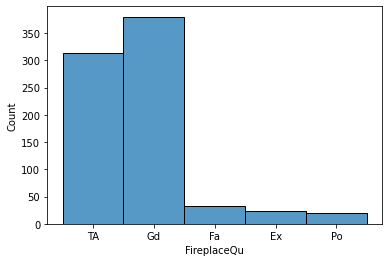

In [715]:
#Check distribution of values in  FireplaceQu before filling null values
sb.histplot(housing.FireplaceQu)

In [716]:
housing.FireplaceQu.value_counts(normalize=True)

Gd    0.493506
TA    0.406494
Fa    0.042857
Ex    0.031169
Po    0.025974
Name: FireplaceQu, dtype: float64

In [717]:
housing.FireplaceQu[~housing['FireplaceQu'].isnull()].value_counts().keys()

Index(['Gd', 'TA', 'Fa', 'Ex', 'Po'], dtype='object')

In [718]:
# Fill all missing values in categorical variables in the same proportion as they are in the values that are present
for column in null_cols:
    keys = housing[column][~housing[column].isnull()].value_counts(normalize=True).keys()
    vals = housing[column][~housing[column].isnull()].value_counts(normalize=True).values
    housing[column].fillna(pd.Series(np.random.choice(keys, p=vals, size=len(housing))), inplace=True)

<AxesSubplot:xlabel='FireplaceQu', ylabel='Count'>

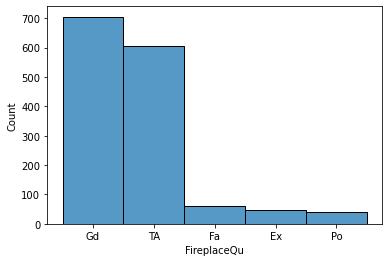

In [719]:
#Check distribution of values in  FireplaceQu after filling null values
sb.histplot(housing.FireplaceQu)

In [720]:
housing.FireplaceQu.value_counts(normalize=True)

Gd    0.482877
TA    0.415753
Fa    0.042466
Ex    0.032192
Po    0.026712
Name: FireplaceQu, dtype: float64

In [721]:
housing[null_cols].isnull().sum()

LotFrontage     0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

### Data Exploration
After taking care of all the missing variable present in the data. We want to explore the data and understand it better

In [722]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [723]:
# Get classification columns from the rest of the data so we can see they contain
classification_columns = housing.select_dtypes(include=['object']).columns

In [724]:
total_no_of_values =0
for cols in classification_columns:
    print('\nColumn name: '+ cols)
    print(housing[cols].value_counts())
    total_no_of_values+=len(housing[cols].value_counts())
print(total_no_of_values)


Column name: MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Column name: Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

Column name: LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Column name: LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Column name: Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Column name: LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Column name: LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Column name: Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
St

In [725]:
#Dropping the Street column since most of the data are in same classification
housing.drop("Street", inplace=True, axis=1)

In [726]:
#Dropping the Utilities column since most of the data are in same classification
housing.drop("Utilities", inplace=True, axis=1)

In [727]:
#Dropping the Condition2 column since most of the data are in same classification
housing.drop("Condition2", inplace=True, axis=1)

In [728]:
#Dropping the RoofMatl column since most of the data are in same classification
housing.drop("RoofMatl", inplace=True, axis=1)

In [729]:
housing.describe().iloc[:,:20]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000


In [730]:
housing.describe().iloc[:,20:]

,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,0.502885,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Looking at the data, we can see that there are many categorical variables with integer or float data types.
<br> We need to separate then and convert them to type object

In [731]:
# Get all columns that are containing continuous data
continuous_vars_cols = ['LotFrontage', 'LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF', 'BsmtUnfSF',
                        '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
                        'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']

In [732]:
housing[continuous_vars_cols].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.117123,443.639726,46.549315,1057.429452,567.240411,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,22.024023,9981.264932,180.731373,456.098091,161.319273,438.705324,441.866955,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,795.750000,223.000000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,70.049958,9478.500000,0.000000,383.500000,0.000000,991.500000,477.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,1298.250000,808.000000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,6110.000000,2336.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


Check the distribution of the date variabes

<AxesSubplot:xlabel='YearRemodAdd', ylabel='Count'>

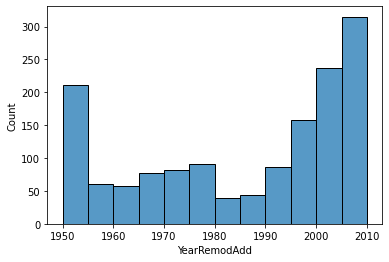

In [734]:
sb.histplot(housing.YearRemodAdd)

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

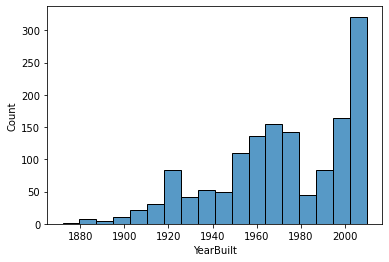

In [735]:
sb.histplot(housing.YearBuilt)

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Count'>

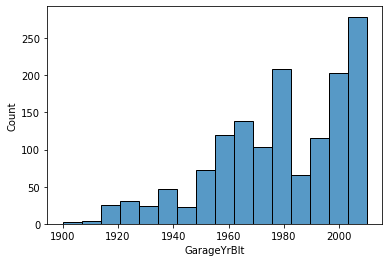

In [736]:
sb.histplot(housing.GarageYrBlt)

In [737]:
#classifying YearBuilt and GarageYrBlt in 3 (Before 1940, Between 1940 and 1980, After 1980)
def get_year_classifier(x):
    if x<1940:
        return 'Before_1980'
    if x >=1940 and x<=1980:
        return '1940_to_1980'
    if x > 1980:
        return 'After_1980'
housing['YearBuilt_cls'] = housing.YearBuilt.apply(get_year_classifier)
housing['GarageYrBlt_cls'] = housing.GarageYrBlt.apply(get_year_classifier)

In [738]:
#Classify YearRemodAdd into Before and After 1980
housing['YearRemodAdd_cls'] = housing.YearBuilt.apply(lambda x: 'Before_1980' if x<1980 else 'After_1980')

In [739]:
housing.YrSold.value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

<AxesSubplot:xlabel='MoSold', ylabel='Count'>

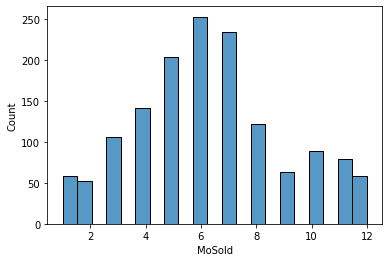

In [740]:
sb.histplot(housing.MoSold)

In [741]:
classification_columns = housing.select_dtypes(include=['object']).columns

In [742]:
#Convert the rest of the categorical variables to object
for col in housing.columns.difference(continuous_vars_cols).difference(classification_columns):
    housing[col] = housing[col].astype('object')

In [743]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   object 
 1   MSSubClass        1460 non-null   object 
 2   MSZoning          1460 non-null   object 
 3   LotFrontage       1460 non-null   float64
 4   LotArea           1460 non-null   int64  
 5   LotShape          1460 non-null   object 
 6   LandContour       1460 non-null   object 
 7   LotConfig         1460 non-null   object 
 8   LandSlope         1460 non-null   object 
 9   Neighborhood      1460 non-null   object 
 10  Condition1        1460 non-null   object 
 11  BldgType          1460 non-null   object 
 12  HouseStyle        1460 non-null   object 
 13  OverallQual       1460 non-null   object 
 14  OverallCond       1460 non-null   object 
 15  YearBuilt         1460 non-null   object 
 16  YearRemodAdd      1460 non-null   object 


In [744]:
#Drop YearBuilt, GarageYrBlt and YearRemodAdd since they are now expressed as YearBuilt_cls GarageYrBlt_cls
# and YearRemodAdd_cls.Remove Id also since it is not useful
housing.drop(['YearBuilt', 'YearRemodAdd', 'Id', 'GarageYrBlt'], inplace=True, axis=1)

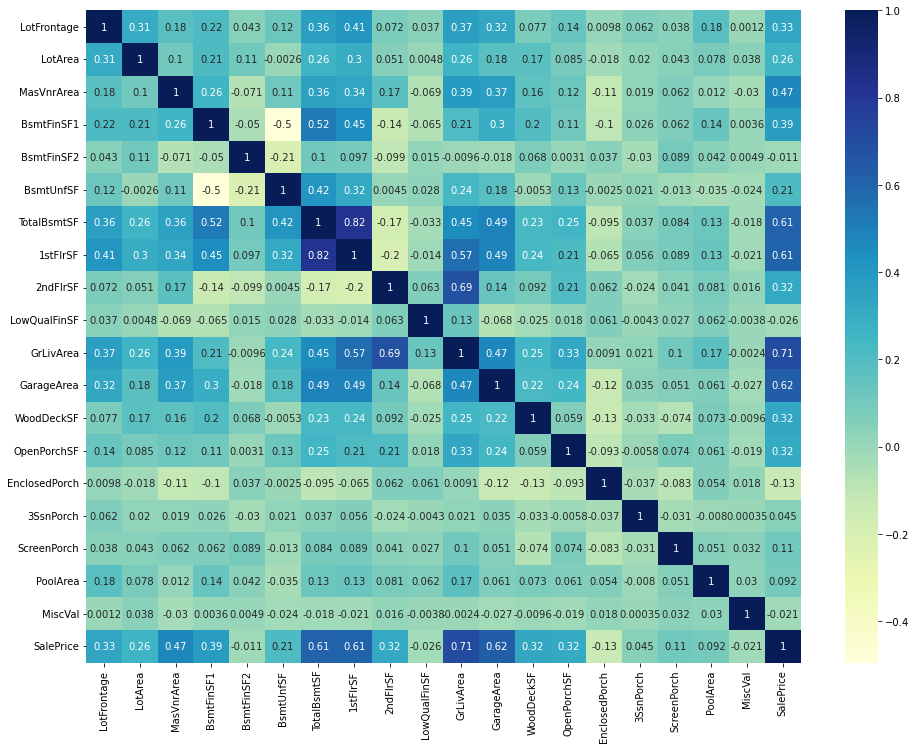

In [745]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,12))

# heatmap
sns.heatmap(housing.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Correlation Obsevations

#### It can be observed that the following independent variables are strongly correlated with the dependent variable
- GrLivArea
- GarageArea
- TotalBsmtSF
- 1stFlrSF
- MasVnrArea
- BsmtFinSF1
- LotFrontage

#### It can also be observed that some independent variables have very high correlation between each other
- TotalBsmtSF and 1stFlrSF
- 1stFlrSF and GrLivArea
- GarageArea and 1stFlrSF
- MasVnrArea and GrLivArea

#### Therefore we must look out for multicolinearity between these independent variables that show strong correlation with each other


### Data Preparation

We are now ready to prepare our data for model building

In [746]:
# split into X and y
X = housing.drop("SalePrice", axis=1)

y = housing['SalePrice']

In [747]:
classification_columns = housing.select_dtypes(include=['object']).columns

In [748]:
# Create dummy variables for all categorical variables

housing_dummies = pd.get_dummies(housing[classification_columns], drop_first=True)
housing_dummies.head()


,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YearBuilt_cls_After_1980,YearBuilt_cls_Before_1980,GarageYrBlt_cls_After_1980,GarageYrBlt_cls_Before_1980,YearRemodAdd_cls_Before_1980
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [749]:
# drop categorical variables 
X = X.drop(classification_columns, axis=1)

# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

# scaling the features - necessary before using Ridge or Lasso

# Storing column names in cols, to preserve column names after scaling 
# During scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

y = scale(y)

In [750]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [751]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YearBuilt_cls_After_1980,YearBuilt_cls_Before_1980,GarageYrBlt_cls_After_1980,GarageYrBlt_cls_Before_1980,YearRemodAdd_cls_Before_1980
210,-0.138531,-0.492374,-0.570750,0.053428,-0.288653,-0.387671,-0.441061,-0.772733,-0.795163,-0.120242,...,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,-0.837635,2.260263,-0.931132,-0.284044,0.849528
318,0.906141,-0.061820,0.846202,1.191731,-0.288653,-0.469172,0.660283,0.541779,2.124318,-0.120242,...,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,1.193838,-0.442426,1.073961,-0.284044,-1.177124
239,-0.819839,-0.177977,-0.570750,-0.766852,-0.288653,0.166984,-0.735209,-0.943516,0.783740,-0.120242,...,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,-0.837635,-0.442426,-0.931132,-0.284044,0.849528
986,-0.501895,-0.521839,-0.570750,-0.973018,-0.288653,-0.186184,-1.305262,-0.418229,0.657703,-0.120242,...,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,-0.837635,2.260263,-0.931132,-0.284044,0.849528
1416,-0.456474,0.082500,-0.570750,-0.973018,-0.288653,0.474875,-0.639440,0.215738,1.597253,-0.120242,...,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,-0.837635,2.260263,-0.931132,-0.284044,0.849528


## Model Building and Evaluation

### Multiple LInear Regression Model
We would build a multiple linear regression model trained with the train data set.

In [843]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-562346067.9658464
[-4.39560784e-02  6.43460742e-02  1.21367608e-02 -3.46480140e+11
 -1.22548034e+11 -3.35669294e+11  3.33267525e+11 -3.13364446e+11
 -3.53845914e+11 -3.94134203e+10  4.25949541e+11 -1.30939484e-02
  2.37045288e-02 -2.32696533e-04  1.34658813e-03  3.01475525e-02
  2.30522156e-02  1.03912354e-02  3.04508209e-03 -2.24609375e-02
 -1.80339813e-02 -1.84631348e-03 -1.55334473e-02 -4.44183350e-02
 -2.24914551e-02 -2.51388550e-02  1.15394592e-02 -1.91154480e-02
 -7.69938614e+10 -4.82864380e-02 -4.44335938e-02 -7.67517090e-03
  2.42839980e+11  8.90655518e-02  5.57632446e-02  2.15621948e-01
  1.84448242e-01  1.68323517e-03 -4.97436523e-03  1.43852234e-02
  3.17382812e-02  2.68096924e-02  7.67669678e-02  2.06451416e-02
 -2.52494812e-02 -6.78253174e-03 -1.25617981e-02  3.27835083e-02
  2.51770020e-03 -5.19180298e-03  5.88226318e-03  1.80740356e-02
  2.97546387e-02  4.89807129e-02  8.21838379e-02 -3.95431519e-02
  3.80096436e-02 -2.28881836e-05 -7.67517090e-03 -3.64303589e-03
  1.21

In [844]:
# Evaluate the model to see how efficient it is in its prediction
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metrics_store = {}
mlr_r2_train = r2_score(y_train, y_pred_train)
metrics_store['mlr_r2_train'] = mlr_r2_train

mlr_r2_test = r2_score(y_test, y_pred_test)
metrics_store['mlr_r2_test'] = mlr_r2_test

mlr_rss_train = np.sum(np.square(y_train - y_pred_train))
metrics_store['mlr_rss_train'] = mlr_rss_train

mlr_rss_test = np.sum(np.square(y_test - y_pred_test))
metrics_store['mlr_rss_test'] = mlr_rss_test

mlr_mse_train = mean_squared_error(y_train, y_pred_train)
metrics_store['mlr_mse_train'] = mlr_mse_train**0.5

mlr_mse_test = mean_squared_error(y_test, y_pred_test)
metrics_store['mlr_mse_test'] = mlr_mse_test**0.5

### Ridge Regression Model

In [845]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 10000, 100000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 10000, 100000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [846]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [847]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

ridge = Ridge(alpha=model_cv.best_params_['alpha'])

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.77793689e-03  3.82973500e-02  3.46824701e-02  3.20224015e-02
  1.11951556e-02  9.87840180e-03  4.73581894e-02  6.85773510e-02
  4.53911300e-02 -5.97752564e-03  8.76056228e-02  4.47516398e-02
  2.56814731e-02  1.02310083e-02 -3.70295334e-03  1.80257805e-02
  1.90155007e-02  3.60363797e-03  2.79801578e-03 -1.59876065e-02
 -3.39187779e-03  4.28933605e-04 -1.92032618e-04  6.26347974e-03
  6.50003634e-03  2.58476288e-04 -4.76177469e-03 -6.00685369e-03
 -1.08682970e-02 -1.56130881e-02 -1.72054166e-02 -6.54422854e-03
 -1.14543489e-02  9.63987969e-03  2.29935280e-03  1.43803941e-02
 -9.25238848e-03  4.15085702e-03 -1.41044546e-02 -1.23915215e-03
  1.40459508e-02  9.43012827e-03  2.22123046e-02  2.18497048e-02
 -1.09405285e-02 -3.87559418e-03 -6.96100536e-03  1.32231349e-02
  1.25239415e-03  1.36415005e-04 -4.72878733e-03 -1.49519378e-03
  1.15945848e-02 -1.05047060e-02  3.96545344e-02 -4.36150518e-02
 -6.30245275e-03 -1.33617476e-02 -1.37636707e-02 -1.95602408e-02
 -1.70577006e-02  2.99479

In [848]:
# Evaluate the model to see how efficient it is in its prediction
y_pred_train = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

ridge_r2_train = r2_score(y_train, y_pred_train)
metrics_store['ridge_r2_train'] = ridge_r2_train

ridge_r2_test = r2_score(y_test, y_pred_test_ridge)
metrics_store['ridge_r2_test'] = ridge_r2_test

ridge_rss_train = np.sum(np.square(y_train - y_pred_train))
metrics_store['ridge_rss_train'] = ridge_rss_train

ridge_rss_test = np.sum(np.square(y_test - y_pred_test_ridge))
metrics_store['ridge_rss_test'] = ridge_rss_test

ridge_mse_train = mean_squared_error(y_train, y_pred_train)
metrics_store['ridge_mse_train'] = ridge_mse_train**0.5

ridge_mse_test = mean_squared_error(y_test, y_pred_test_ridge)
metrics_store['ridge_mse_test'] = ridge_mse_test**0.5

### Lasso Regression Model

In [849]:
#Instantiate the class for Lasso regression and use same number of folds,
#scoring and params_grid and we did for Ridge

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 10000, 100000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [850]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [851]:
#Fitting Ridge model for alpha = 0.01 and printing coefficients which have been penalised

lasso = Lasso(alpha=model_cv.best_params_['alpha'])
        
lasso.fit(X_train, y_train)

print(lasso.intercept_)
print(lasso.coef_)

-0.004709390148477065
[-4.59738936e-06  4.21433692e-02  4.81140352e-03  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  3.99798605e-02  1.29968777e-02
  0.00000000e+00 -1.51910882e-02  2.94804795e-01  3.39863704e-02
  1.54818455e-02  0.00000000e+00 -0.00000000e+00  1.84805028e-02
  1.44194439e-02 -0.00000000e+00  0.00000000e+00 -5.62966705e-03
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -3.27841724e-03  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -7.99289996e-03  0.00000000e+00  0.00000000e+00  1.68999967e-02
 -0.00000000e+00  0.00000000e+00 -7.28223763e-03 -0.00000000e+00
  0.00000000e+00  2.82637349e-03  2.86004684e-02  2.29280274e-02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  1.12944122e-02
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.74594723e-02  0.00000000e+00  5.25308319e-02 -4.93028396e-02
  0.00000000e+00 -9.54688384e-03 -7.88204282e-03 -1.06842422e-03
 -5

In [852]:
# Evaluate the model to see how efficient it is in its prediction
y_pred_train = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

lasso_r2_train = r2_score(y_train, y_pred_train)
metrics_store['lasso_r2_train'] = lasso_r2_train

lasso_r2_test = r2_score(y_test, y_pred_test_lasso)
metrics_store['lasso_r2_test'] = lasso_r2_test

lasso_rss_train = np.sum(np.square(y_train - y_pred_train))
metrics_store['lasso_rss_train'] = lasso_rss_train

lasso_rss_test = np.sum(np.square(y_test - y_pred_test_lasso))
metrics_store['lasso_rss_test'] = lasso_rss_test

lasso_mse_train = mean_squared_error(y_train, y_pred_train)
metrics_store['lasso_mse_train'] = lasso_mse_train**0.5

lasso_mse_test = mean_squared_error(y_test, y_pred_test_lasso)
metrics_store['lasso_mse_test'] = lasso_mse_test**0.5

In [853]:
#Printing the result of all the metrics from MLR, Ridge and Lasso Regression
metrics_store

{'mlr_r2_train': 0.9198427533680685,
 'mlr_r2_test': -1.931134892511649e+22,
 'mlr_rss_train': 81.09662158992843,
 'mlr_rss_test': 8.630880908175908e+24,
 'mlr_mse_train': 0.2818308367766134,
 'mlr_mse_test': 140375238389.51453,
 'ridge_r2_train': 0.8931712581746699,
 'ridge_r2_test': 0.8611877819883169,
 'ridge_rss_train': 108.08068408983723,
 'ridge_rss_test': 62.0397739642292,
 'ridge_mse_train': 0.32535776148376266,
 'ridge_mse_test': 0.37635531024954955,
 'lasso_r2_train': 0.896150100797947,
 'lasso_r2_test': 0.8596482175038249,
 'lasso_rss_train': 105.06693195704355,
 'lasso_rss_test': 62.72785628140099,
 'lasso_mse_train': 0.32078950714031423,
 'lasso_mse_test': 0.3784366310856956}

### Observations so far
It can be seen that the model obtain with multiple linear regression is cleary overfitting because it performs very well on train data and performs woefully on the test data. This of course is expected since the model was built with 292 independent variables.

It can be observed from comparing the R squared values of Ridge and Lasso models that both of them have similar values on train data. However with test data, it appears that Ridge regression model has a slighty better performance than the Lasso regression in this case. This could be attributed to the fact the Lasso regression is actually able to do features selection by setting the Beta values of some variables to zero. This may have eliminated some features that are relevant to prediction.

### Model Coeficents inspection
We would take a look into the coefficients derived by each of the models to compare their respecctice coefficients and understand which variables are most relevant in predicting the price of a house.

In [840]:
coefficients = pd.DataFrame(index=X.columns)

coefficients.rows = X.columns

coefficients['Linear'] = lm.coef_
coefficients['Ridge'] = ridge.coef_
coefficients['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)


In [854]:
# We would sort in descending order using the Lasso coefficients.
# We will display the most relevant 70 variables out of 292
coefficients= coefficients.sort_values(by=['Lasso'], ascending=False)
coefficients.head(70)

,Linear,Ridge,Lasso
GrLivArea,4.259495e+11,0.207754,0.283195
OverallQual_9,4.781900e+10,0.121176,0.155903
OverallQual_8,9.025417e+10,0.082367,0.105908
OverallQual_10,3.121046e+10,0.089580,0.098319
GarageCars_3,1.286087e-01,0.128543,0.089268
FullBath_3,8.596802e-02,0.085918,0.065328
Neighborhood_NoRidge,9.612274e-02,0.096245,0.059229
Fireplaces_2,5.690002e-02,0.056993,0.058550
Neighborhood_NridgHt,1.062317e-01,0.106330,0.056477
BsmtExposure_Gd,6.126404e-02,0.061294,0.056214


### Model Evaluation

#### Showing that the relationship between dependent and independent variables are linear

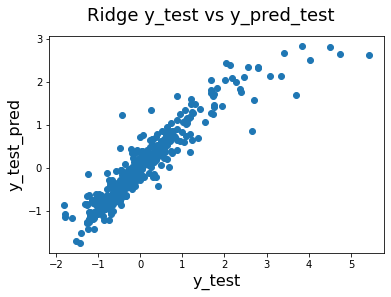

In [819]:
# Plotting y_test and y_pred_test to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test_ridge)
fig.suptitle('Ridge y_test vs y_pred_test', fontsize = 18)
plt.xlabel('y_test', fontsize = 16) 
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

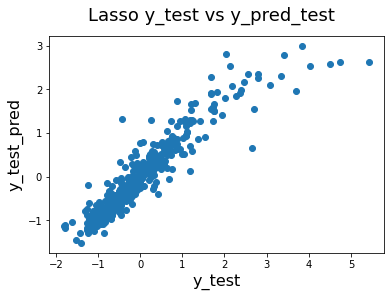

In [820]:
# Plotting y_test and y_pred_test for Lasso

fig = plt.figure()
plt.scatter(y_test, y_pred_test_lasso)
fig.suptitle('Lasso y_test vs y_pred_test', fontsize = 18)
plt.xlabel('y_test', fontsize = 16) 
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

#### Plotting Error Terms to show normality condition is satisfied

In [821]:
lasso_residual = y_test - y_pred_test_lasso
ridge_residual = y_test - y_pred_test_ridge

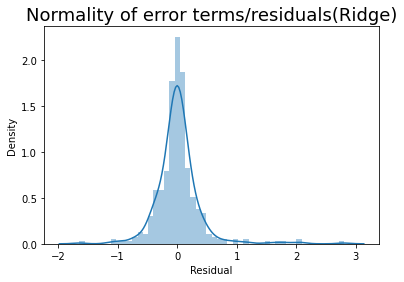

In [822]:
sb.distplot(ridge_residual, kde=True)
plt.title('Normality of error terms/residuals(Ridge)', fontsize = 18)
plt.xlabel("Residual")
plt.show()

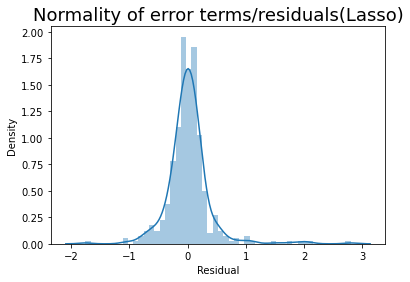

In [823]:
sb.distplot(lasso_residual, kde=True)
plt.title('Normality of error terms/residuals(Lasso)', fontsize = 18)
plt.xlabel("Residual")
plt.show()

#### Plot to show that the homoscedasticity assumption is satisfied and Error terms are Independent

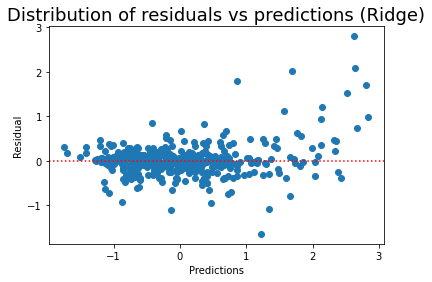

In [824]:
plt.scatter( y_pred_test_ridge , ridge_residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.title('Distribution of residuals vs predictions (Ridge)', fontsize = 18)
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

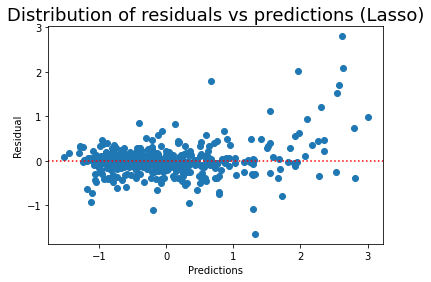

In [825]:
plt.scatter( y_pred_test_lasso , ridge_residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.title('Distribution of residuals vs predictions (Lasso)', fontsize = 18)
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Most relevant variables for Price prediction

We would examine the table above where we conpare the coefficients and  pick out the variables that have non zero coefficients from Lasso regression.

Even though Ridge regression seems to perform better, the difference is almost negligible, hence we can still use the non zero coefficient variables from Lasso (which mostly corressponds to the coefficients from Ridge regression) to determine the most relevant variables.

In [855]:
coefficients.index[:70]

Index(['GrLivArea', 'OverallQual_9', 'OverallQual_8', 'OverallQual_10',
       'GarageCars_3', 'FullBath_3', 'Neighborhood_NoRidge', 'Fireplaces_2',
       'Neighborhood_NridgHt', 'BsmtExposure_Gd', 'GarageArea',
       'YearBuilt_cls_After_1980', 'TotalBsmtSF', 'Neighborhood_Crawfor',
       'TotRmsAbvGrd_10', 'Condition1_Norm', 'CentralAir_Y', 'BsmtFullBath_1',
       'SaleType_New', 'LotArea', 'OverallQual_7', 'BsmtFinType1_GLQ',
       '1stFlrSF', 'Neighborhood_Somerst', 'Functional_Typ', 'Fireplaces_1',
       'HalfBath_1', 'LotConfig_CulDSac', 'KitchenAbvGr_1',
       'GarageType_Attchd', 'Exterior2nd_VinylSd', 'Exterior1st_BrkFace',
       'OverallCond_7', 'WoodDeckSF', 'MSZoning_RL', '3SsnPorch',
       'Condition1_PosA', 'Neighborhood_Veenker', 'ScreenPorch',
       'Neighborhood_ClearCr', 'LandContour_Lvl', 'GarageYrBlt_cls_After_1980',
       'BsmtHalfBath_1', 'MasVnrArea', 'OverallCond_8', 'GarageCond_TA',
       'GarageCars_4', 'BsmtFinSF1', 'SaleType_Con', 'MSSubClass_85'

These are the variables
 - GrLivArea
 - OverallQual_9
 - OverallQual_8
 - OverallQual_10
 - GarageCars_3
 - FullBath_3
 - Neighborhood_NoRidge
 - Neighborhood_NridgHt
 - Fireplaces_2
 - BsmtExposure_Gd
 - Neighborhood_Crawfor
 - Condition1_Norm
 - OverallQual_7
 - TotRmsAbvGrd_10
 - SaleType_New
 - Neighborhood_Somerst
 - LotArea
 - BsmtFullBath_1
 - TotalBsmtSF
 - YearBuilt_cls_After_1980
 - GarageArea
 - Functional_Typ
 - LandContour_Lvl
 - Fireplaces_1
 - BsmtFinType1_GLQ
 - HalfBath_1
 - Exterior2nd_VinylSd
 - CentralAir_Y
 - HouseStyle_1Story
 - Exterior1st_BrkFace
 - LotConfig_CulDSac
 - OverallCond_7
 - 3SsnPorch
 - Neighborhood_ClearCr
 - MSZoning_RL
 - WoodDeckSF
 - Condition1_PosA
 - ScreenPorch
 - Neighborhood_StoneBr
 - Condition1_RRAn
 - 1stFlrSF
 - BsmtHalfBath_1
 - GarageCars_4
 - Neighborhood_Veenker
 - GarageType_Attchd
 - LandSlope_Mod
 - OverallCond_8
 - MoSold_7
 - Foundation_PConc
 - SaleCondition_Normal
 - RoofStyle_Mansard
 - OverallCond_9
 - SaleType_Con
 - RoofStyle_Shed
 - GarageYrBlt_cls_After_1980
 - MasVnrArea
 - GarageCond_TA
 - Exterior2nd_ImStucc
 - BsmtCond_TA
 - BedroomAbvGr_4
 - LandContour_Low

Selecting the combining the split dummy variables back to their original Variables
These are the variables
 - GrLivArea
 - OverallQual
 - GarageCars
 - FullBath
 - Neighborhood
 - Fireplaces
 - BsmtExposure
 - Condition1
 - TotRmsAbvGrd
 - SaleType
 - LotArea
 - BsmtFullBath
 - TotalBsmtSF
 - YearBuilt
 - GarageArea
 - Functional
 - LandContour
 - BsmtFinType1
 - HalfBath
 - Exterior2nd
 - CentralAir
 - HouseStyle
 - Exterior1st
 - LotConfig
 - OverallCond
 - 3SsnPorch
 - MSZoning
 - WoodDeckSF
 - ScreenPorch
 - 1stFlrSF
 - GarageCars
 - GarageType
 - LandSlope
 - MoSold
 - Foundation
 - SaleCondition
 - RoofStyle
 - GarageYrBlt
 - MasVnrArea
 - GarageCond
 - Exterior2nd
 - BsmtCond
 - BedroomAbvGr

### These Variables explains about 86% of the changes in price of houses

### Problem statement part II

In [832]:
#Fitting Ridge model for alpha = 1000 and printing coefficients which have been penalised

ridge = Ridge(alpha=1000)

ridge.fit(X_train, y_train)

y_pred_test_ridge = ridge.predict(X_test)
y_pred_train = ridge.predict(X_train)

print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test_ridge))


0.8739095667190389
0.8498624810699573


In [833]:
#Fitting Ridge model for alpha = 0.02 and printing coefficients which have been penalised

lasso = Lasso(alpha=0.02)
        
lasso.fit(X_train, y_train)

y_pred_train = lasso.predict(X_train)
y_pred_test_lasso = ridge.predict(X_test)

print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test_lasso))

0.8768264791987768
0.8498624810699573


### Remodelling without the 5 topmost variables

In [890]:
# split into X and y
X = housing.drop("SalePrice", axis=1)

y = housing['SalePrice']
to_drop= ['GrLivArea', 'OverallQual', 'GarageCars', 'FullBath', 'Neighborhood']

X.drop(to_drop, axis=1, inplace=True)

classification_columns = housing.select_dtypes(include=['object']).columns
classification_columns=classification_columns.drop(['OverallQual', 'GarageCars', 'FullBath', 'Neighborhood'])

# Create dummy variables for all categorical variables

housing_dummies = pd.get_dummies(housing[classification_columns], drop_first=True)
housing_dummies.head()


,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YearBuilt_cls_After_1980,YearBuilt_cls_Before_1980,GarageYrBlt_cls_After_1980,GarageYrBlt_cls_Before_1980,YearRemodAdd_cls_Before_1980
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [892]:
# drop categorical variables 
X = X.drop(classification_columns, axis=1)

# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

# scaling the features - necessary before using Ridge or Lasso

# Storing column names in cols, to preserve column names after scaling 
# During scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

y = scale(y)

# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [893]:
# Ridge Regression
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 10000, 100000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

ridge = Ridge(alpha=model_cv.best_params_['alpha'])

ridge.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'alpha': 500}


Ridge(alpha=500)

In [894]:
# Lasso
#Instantiate the class for Lasso regression and use same number of folds,
#scoring and params_grid and we did for Ridge

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

#Fitting Ridge model for alpha = 0.01 and printing coefficients which have been penalised

lasso = Lasso(alpha=model_cv.best_params_['alpha'])
        
lasso.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'alpha': 0.01}


Lasso(alpha=0.01)

In [895]:
coefficients = pd.DataFrame(index=X.columns)

coefficients.rows = X.columns

coefficients['Ridge'] = ridge.coef_
coefficients['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)
coefficients= coefficients.sort_values(by=['Lasso'], ascending=False)
coefficients.head(70)

,Ridge,Lasso
2ndFlrSF,0.088394,0.285173
1stFlrSF,0.113057,0.248604
GarageArea,0.087012,0.099507
YearBuilt_cls_After_1980,0.036546,0.090655
Fireplaces_2,0.072219,0.086707
TotRmsAbvGrd_10,0.097883,0.084606
BsmtExposure_Gd,0.064488,0.075838
TotalBsmtSF,0.078125,0.073490
Condition1_Norm,0.030934,0.060817
MasVnrArea,0.074914,0.057974


In [898]:
coefficients.index[:30]

Index(['2ndFlrSF', '1stFlrSF', 'GarageArea', 'YearBuilt_cls_After_1980',
       'Fireplaces_2', 'TotRmsAbvGrd_10', 'BsmtExposure_Gd', 'TotalBsmtSF',
       'Condition1_Norm', 'MasVnrArea', 'BsmtFinType1_GLQ', 'Fireplaces_1',
       'Functional_Typ', 'KitchenAbvGr_1', 'SaleType_New', 'LotArea',
       'Exterior1st_BrkFace', 'LotConfig_CulDSac', 'WoodDeckSF',
       'OverallCond_9', 'HouseStyle_1Story', 'LandContour_Lvl',
       'BsmtFullBath_1', 'Condition1_RRAn', 'TotRmsAbvGrd_9', 'MoSold_7',
       'CentralAir_Y', 'LandContour_HLS', 'BedroomAbvGr_4', 'OverallCond_7'],
      dtype='object')